part 1
Method won't converge
[-3.60895395 -5.66900303]
-------------------------------------------------
Part 2
-----------------------------------------
gamma = 5e-2
Part 3
-------------------------------------------
gamma = 0
Method won't converge
[-3.60895395 -5.66900303]


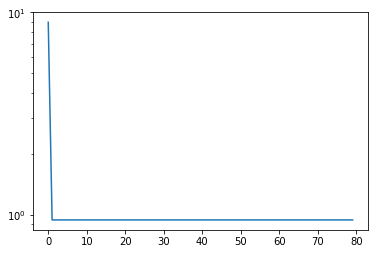

----------------------------------------
gamma = 1e-1
Method won't converge
[-3.60895395 -5.66900303]


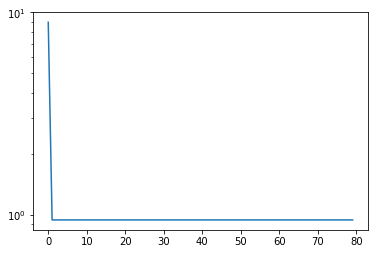

------------------------------------------------
gamma = 1e-2
Method won't converge
[-3.60895395 -5.66900303]


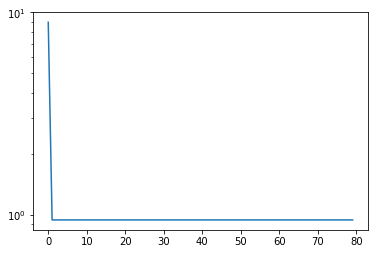

In [3]:
#Saurav Adhikari - 1622912
#Lalita Awasthi - 1622924
#Nila Ravindran - 1614113


import numpy as np
import matplotlib.pyplot as plt



def sigmoidal(t):
	return 1/(1 + np.exp(-t))


def dsigmoidal(t):
	s = sigmoidal(t)
	return s * (1 - s)


def generate_data(gamma=0.0, seed=99):
	np.random.seed(seed)
	n = 10
	t = np.random.rand(n) - 0.5
	noise = np.random.randn(n)*gamma
	signal = sigmoidal(t*6. - 1.)
	alpha = signal + noise
	return t, alpha


def generate_probabilities(gamma=0.0, seed=99):
	np.random.seed(seed)
	n = 10
	t = np.random.rand(n) - 0.5
	noise = np.random.rand(n)*gamma
	signal = sigmoidal(t*6. + 2.)*(1 - noise)
	alpha = signal
	return t, alpha


def plot(x, gamma):
	t, alpha = generate_data(gamma)
	t_axis = np.linspace(-3, 3, 50)
	plt.scatter(t, alpha)
	plt.plot(t_axis, sigmoidal(t_axis*x[0] + x[1]))
	plt.show()


def convergence_plot(delta_x_list):
	plt.plot(delta_x_list)
	plt.yscale("log")
	plt.show()


def armijo(f, x, g, d, rho=0.5, c=0.01, alpha=1, **kwargs):
	"""Armijo line search

	Parameters:
		f: callable, Function to be minimized
		x: ndarray, current iterate x
		g: ndarray, current gradient of f() at x
		d: ndarray, current descent direction, e.g. -g
		rho: [float], scaling factor of stepsize
		c: [float], factor in minimum decrease condition
		alpha: [float], start step size
		**kwargs: [keyword args]
	Returns: float"""
	f_x = f(x)

	gTd = g.dot(d)
	while f(x + alpha*d) > f_x + c*alpha*gTd:
		alpha *= rho
	return alpha

t, alpha = generate_probabilities()

def J(x):
	j = np.zeros([10, 2])
	for i in range(0, 10):
		j[i][0] = sigmoidal(x[0]*t[i] + x[1]) * (1 - sigmoidal(x[0]*t[i] + x[1])) * t[i]
	for y in range(0, 10):
		j[y][1] = sigmoidal(x[0]*t[y] + x[1]) * (1 - sigmoidal(x[0]*t[y] + x[1]))
	return j


def F(x,gamma = 0):
	F_x = np.zeros([10, 1])

	for i in range(1,10):
		F_x[i] = sigmoidal(x[0]*t[i] + x[1])

	return F_x

def f(x):
	F_x = F(x)
	f_x = 0

	for i in range(1, 10):
		f_x += -np.log(F_x[i])*alpha[i] - np.log(1-F_x[i])*(1-alpha[i])


	return f_x[0]


def Gauss_Newton(x, tol, max_iter, gamma):
    delt = list()

    for i in range(0, max_iter):
        B = np.dot(J(x).T, J(x))
        delt_x = np.linalg.solve(B, -np.dot(J(x).T, F(x, gamma)))

        tau = armijo(f, x, np.squeeze(np.asarray(J(x).T.dot(F(x, gamma)))), np.squeeze(np.asarray(-J(x).T.dot(F(x, gamma)))))

        delt.append(np.linalg.norm(delt_x[:,0]))
        if np.linalg.norm(delt_x[:,0]) < tol:
            print(f"Method converge after {i+1}th iterations")
            return x, delt
        x = x + tau*delt_x[:,0]
    print("Method won't converge")
    return x, delt

x = np.array([1, 2])


print("part 1")

#for gamma = 0
gamma = 0
y, delta = Gauss_Newton(x, 1e-4, 80, gamma)
print(y)

print("-------------------------------------------------")

print("Part 2")
print("-----------------------------------------")
print("gamma = 5e-2")
#for gamma = 5e-2
x = np.array([1, 2])




print("Part 3")
print("-------------------------------------------")

print("gamma = 0")
#for gamma = 0
gamma = 0
y, delta = Gauss_Newton(x, 1e-4, 80, gamma)
print(y)
convergence_plot(delta)
print("----------------------------------------")


print("gamma = 1e-1")
#for gamma = 1e-1
gamma = 1e-1
y, delta = Gauss_Newton(x, 1e-4, 80, gamma)
print(y)
convergence_plot(delta)
print("------------------------------------------------")

#for gamma = 1e-2
print("gamma = 1e-2")
gamma = 1e-3
y, delta = Gauss_Newton(x, 1e-4, 80, gamma)
print(y)
convergence_plot(delta)
